In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, auc,roc_auc_score,average_precision_score

from sklearn.preprocessing import StandardScaler

In [2]:
train_df = pd.read_csv('../dataset/train.csv')
val_df = pd.read_csv('../dataset/val.csv')
test_df = pd.read_csv('../dataset/test.csv')

In [5]:
from sklearn.preprocessing import RobustScaler

# col=[col for col in val_df.columns if col not in ['ID','Class']]

# for i in col:
#     sc=RobustScaler()
#     val_df[i]=sc.fit_transform(val_df[i].values.reshape(-1,1))

X=val_df.drop(labels=['ID','Class'],axis=1)

<AxesSubplot:>

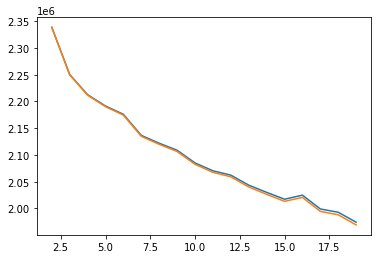

In [6]:
# from sklearn.mixture import GaussianMixture

# bic=[]
# aic=[]

# for component in np.arange(2,20):

#     gm=GaussianMixture(n_components=component,n_init=10,covariance_type='spherical')

#     gm.fit(X)
#     bic.append(gm.bic(X))
#     aic.append(gm.aic(X))


# sns.lineplot(x=np.arange(2,20),y=bic,markers=True)
# sns.lineplot(x=np.arange(2,20),y=aic,markers=True)

In [67]:
gm=GaussianMixture(n_components=5,n_init=10,covariance_type='spherical')

gm.fit(train_df.drop(columns=['ID']))

densities=gm.score_samples(X)
density_threshold=np.percentile(densities,0.1)
density_threshold

-217.20532213499803

In [68]:
val_df['Gm_predict']=0

val_df.loc[val_df[densities<density_threshold].index,'Gm_predict']=1

In [69]:
val_df.Gm_predict.value_counts()

0    28433
1       29
Name: Gm_predict, dtype: int64

In [70]:
from sklearn.metrics import f1_score

In [71]:
y_true = val_df.Class.values
y_pred = val_df.Gm_predict.values

In [72]:
f1_score(y_true, y_pred, average='macro')

0.5334147035723918